<a href="https://colab.research.google.com/github/murpunk/Programming_2023/blob/main/05_05_23_GBM_10_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Список литературы

1. Жерон, Орельен. Прикладное машинное обучение с помощью Scikit-Learn и TensorFlow: концепции, инструменты и техники для создания интеллектуальных систем. Пер. с англ. СпБ.: ООО Альфа-книга: 2018. С. 251—261.

2. Андреас Мюллер, Сара Гвидо Введение в машинное обучение с помощью Python. Руководство для специалистов по работе с данными. С. 106—110.

3. Рашка Себастьян, Мирджалили Вахид Python и машинное обучение: машинное и глубокое обучение с использованием Python, scikit-learn и TensorFlow 2, 3-е изд.: Пер. с англ. СПб. : ООО "Диалектика", 2020. С. 302-312.

4. К.В. Воронцов Математические методы обучения по прецедентам (теория обучения машин). 141 с.

5. Машинное обучение (курс лекций, К.В.Воронцов): Многомерная линейная регрессия (курс лекций, К.В.Воронцов)
(machinelearning.ru) (лекция К.В. Воронцов “Линейные ансабли”: https://www.youtube.com/watch?v=-wa43XNJfVI)

6. Крис Элбон Машинное обучение с использованием Python. Сборник рецептов. Пер. с англ. СПб. : БХВ-Петербург, 2019. 384 с.

# I. Прочитайте рекомендованную литературу

# II. Выполните задание из файла statement-gbm.pdf

### 1.  Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма)

В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.


In [9]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv("/content/drive/MyDrive/Программирование/gbm-data.csv")
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.fillna(0)

In [11]:
X = df.loc[:, "D1":"D1776"].values # признаки
y = df["Activity"].values # целевая переменная

In [12]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.8, random_state = 241)

### 2. Обучите GradientBoostingClassifier

Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:


* Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой
итерации.

* Преобразуйте полученное предсказание по формуле $\frac{1}{1+e^{-y_pred}}$, где y_pred — предсказанное значение.


* Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

In [13]:
import math

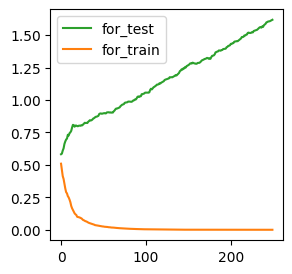

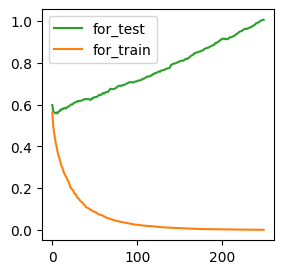

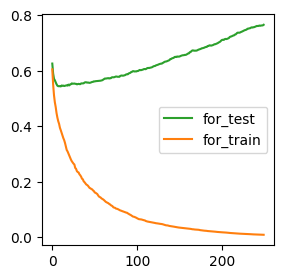

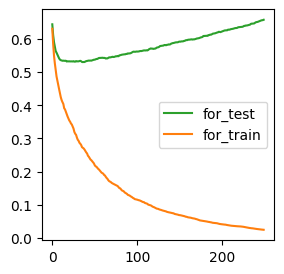

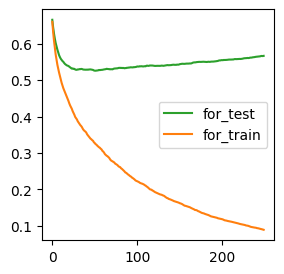

In [18]:
learning_rate = [1, 0.5, 0.3, 0.2, 0.1]
for i in learning_rate:
    model = GradientBoostingClassifier(learning_rate = i, n_estimators=250, verbose=False, random_state=241)
    model.fit(X_train, y_train)

    # Используйте метод staged_decision_function
    # для предсказания качества на обучающей и тестовой выборке на каждой итерации.

    # Преобразуйте полученное предсказание по формуле.
    # Вычислить значений log-loss (которую можно посчитать с помощью функции
    # sklearn.metrics.log_loss) на обучающей и тестовой выборках
    for_train = []
    for x in model.staged_decision_function(X_train):
        for_train.append(log_loss(y_train, [1.0 / (1.0 + math.exp(-i)) for i in x]))
    for_test = []
    for x in model.staged_decision_function(X_test):
        for_test.append(log_loss(y_test, [1.0 / (1.0 + math.exp(-i)) for i in x]))


    # Вычислите и постройте график
    plt.figure(figsize=(3, 3))
    plt.plot(for_test, "#2ca02c")
    plt.plot(for_train, "#ff7f0e")
    plt.legend(["for_test", "for_train"], loc="best")

Найдите минимальное значение метрики и номер итерации, на которой оно достигается.

In [32]:
def formula(y_pred):
    return 1. / (1 + math.e ** -y_pred)

In [37]:
min_loss_metrics = {}
for x in learning_rate:
  print(f"Коэффициент скорости обучения: {x}")

  model = GradientBoostingClassifier(learning_rate = x, n_estimators=250, verbose=False, random_state=241)
  model.fit(X_train, y_train)

  test_loss = [log_loss(y_test, formula(y_pred)) for y_pred in model.staged_decision_function(X_test)]
#  train_loss = [log_loss(y_train, formula(y_pred)) for y_pred in model.staged_decision_function(X_train)]

  min_loss_value = min(test_loss)
  min_loss_index = test_loss.index(min_loss_value) + 1
  min_loss_metrics[x] = min_loss_value, min_loss_index

  print(f"Минимальный loss: {round(min_loss_value, 2)} при итерации = {min_loss_index}\n")

Коэффициент скорости обучения: 1
Минимальный loss: 0.58 при итерации = 1

Коэффициент скорости обучения: 0.5
Минимальный loss: 0.56 при итерации = 7

Коэффициент скорости обучения: 0.3
Минимальный loss: 0.54 при итерации = 11

Коэффициент скорости обучения: 0.2
Минимальный loss: 0.53 при итерации = 37

Коэффициент скорости обучения: 0.1
Минимальный loss: 0.53 при итерации = 52



### 3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)?

In [ ]:
???

### 4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

In [ ]:
min_loss_value, min_loss_index = min_loss_results[0.2]
print(f"{min_loss_value:.2f} {min_loss_index}")

### 5. На этих же данных обучите RandomForestClassifier

с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно).

In [ ]:
model = RandomForestClassifier(n_estimators=min_loss_index, random_state=241)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1]
test_loss = log_loss(y_test, y_pred)

print_answer(3, f"{test_loss:.2f}")